In [1]:
import sklearn
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
df=pd.read_csv("dataset.csv")
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [3]:
df.drop(columns=["Patient_ID","Thyroid_Cancer_Risk"],inplace=True)

In [4]:
df.isna().sum()

Age                   0
Gender                0
Country               0
Ethnicity             0
Family_History        0
Radiation_Exposure    0
Iodine_Deficiency     0
Smoking               0
Obesity               0
Diabetes              0
TSH_Level             0
T3_Level              0
T4_Level              0
Nodule_Size           0
Diagnosis             0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.dtypes

Age                     int64
Gender                 object
Country                object
Ethnicity              object
Family_History         object
Radiation_Exposure     object
Iodine_Deficiency      object
Smoking                object
Obesity                object
Diabetes               object
TSH_Level             float64
T3_Level              float64
T4_Level              float64
Nodule_Size           float64
Diagnosis              object
dtype: object

In [7]:
for i in df:
    print(df[i].value_counts())

Age
72    2997
33    2946
29    2942
59    2917
40    2914
      ... 
45    2738
38    2735
66    2735
81    2732
84    2651
Name: count, Length: 75, dtype: int64
Gender
Female    127527
Male       85164
Name: count, dtype: int64
Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64
Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64
Family_History
No     148866
Yes     63825
Name: count, dtype: int64
Radiation_Exposure
No     180831
Yes     31860
Name: count, dtype: int64
Iodine_Deficiency
No     159673
Yes     53018
Name: count, dtype: int64
Smoking
No     170260
Yes     42431
Name: count, dtype: int64
Obesity
No     148805
Yes     63886
Name: count, dtype: int64
Diabetes
No     170098
Yes     4

In [8]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

In [9]:
le_dict1={}
for i in df:
    if df[i].nunique()==2:
        le_dict1[i]=LabelEncoder()
        df[i]=le_dict1[i].fit_transform(df[i])

In [10]:
# dict1[].inverse_transform([0])

In [11]:
df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Diagnosis
0,66,1,Russia,Caucasian,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0
1,29,1,Germany,Hispanic,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0
2,86,1,Nigeria,Caucasian,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0
3,75,0,India,Asian,0,0,0,0,0,0,4.10,2.62,11.04,2.46,0
4,35,0,Germany,African,1,1,0,0,0,0,9.10,2.11,10.71,2.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,0,India,Asian,0,0,0,0,1,0,2.00,0.64,11.92,1.48,0
212687,89,1,Japan,Middle Eastern,0,0,0,0,1,0,9.77,3.25,7.30,4.46,0
212688,72,0,Nigeria,Hispanic,0,0,0,0,0,1,7.72,2.44,8.71,2.36,0
212689,85,0,Brazil,Middle Eastern,0,0,0,0,0,1,5.62,2.53,9.62,1.54,0


In [12]:
df[df['Diagnosis']==1]

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Diagnosis
6,89,0,South Korea,Asian,1,1,0,0,1,0,4.70,0.62,11.73,0.01,1
8,17,0,Russia,African,0,1,0,0,0,1,2.30,2.60,11.89,0.81,1
10,67,1,Nigeria,African,0,1,0,0,0,0,9.65,1.82,8.17,0.35,1
12,44,1,South Korea,Asian,1,0,0,0,0,1,6.77,1.37,6.13,4.15,1
21,63,0,Nigeria,Asian,0,0,0,0,1,1,6.97,3.48,7.67,0.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212656,31,0,India,Hispanic,0,0,0,0,0,0,1.96,3.06,10.14,0.60,1
212657,83,1,India,Middle Eastern,0,0,0,0,0,0,6.53,3.02,6.73,4.29,1
212674,56,0,Russia,Caucasian,1,0,0,0,0,0,4.03,1.40,10.79,3.30,1
212684,53,1,Nigeria,Hispanic,1,1,0,0,1,0,0.68,1.23,11.19,0.95,1


In [13]:
lst1=["Country","Ethnicity"]

In [14]:
oh_dict1={}
for i in lst1:
    oh_dict1[i]=OneHotEncoder(sparse_output=False,drop='first')
    res=oh_dict1[i].fit_transform(df[[i]])
    res=pd.DataFrame(res,columns=oh_dict1[i].get_feature_names_out())
    df=df.join(res)
    df.drop(columns=i,inplace=True)

In [15]:
oh_dict1['Country'].get_feature_names_out()

array(['Country_China', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_Nigeria', 'Country_Russia',
       'Country_South Korea', 'Country_UK', 'Country_USA'], dtype=object)

In [16]:
df

,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,66,1,0,1,0,0,0,0,9.37,1.67,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29,1,0,1,0,0,0,0,1.83,1.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,86,1,0,0,0,0,0,0,6.26,2.59,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75,0,0,0,0,0,0,0,4.10,2.62,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,35,0,1,1,0,0,0,0,9.10,2.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,0,0,0,0,0,1,0,2.00,0.64,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212687,89,1,0,0,0,0,1,0,9.77,3.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212688,72,0,0,0,0,0,0,1,7.72,2.44,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212689,85,0,0,0,0,0,0,1,5.62,2.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df_new=df.sample(20000)

In [18]:
df_new

,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
33549,30,0,0,0,1,1,0,0,7.64,3.46,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
173625,50,0,0,0,0,0,0,0,5.54,1.47,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
184567,71,0,0,0,0,0,0,0,5.33,1.76,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208701,40,0,0,0,0,0,1,0,6.64,3.05,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89508,64,1,0,0,0,0,0,0,8.22,2.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,63,1,1,0,1,0,0,0,7.43,2.24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
81409,75,1,0,0,1,0,0,0,5.71,1.14,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
145404,79,0,1,0,0,0,0,0,0.22,1.65,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40048,44,1,0,0,0,1,1,1,9.12,3.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


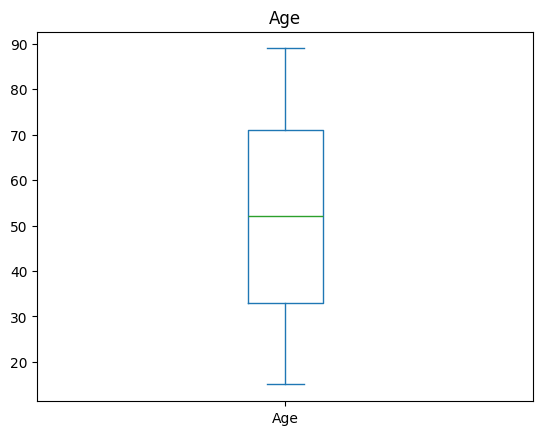

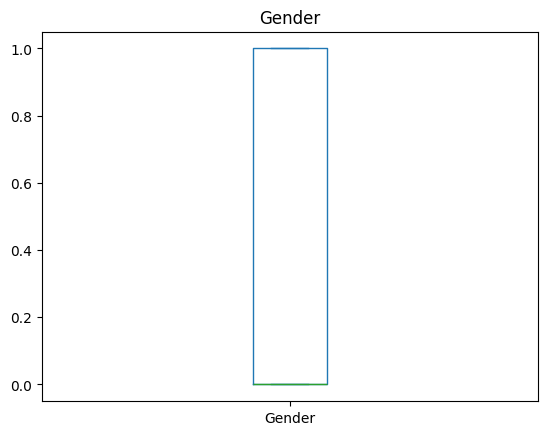

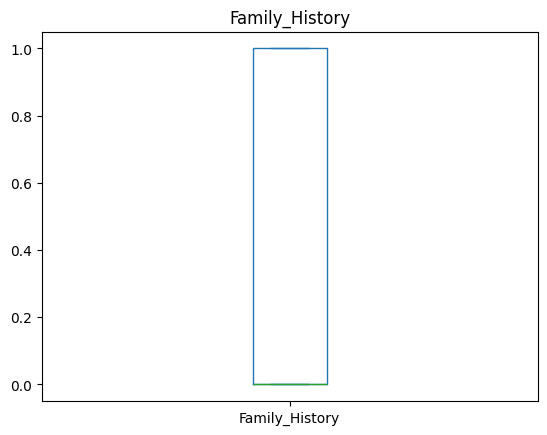

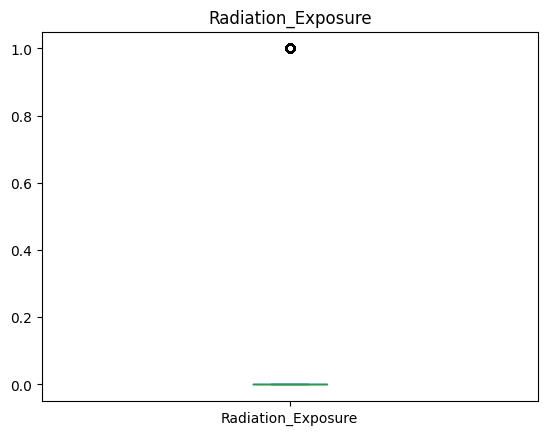

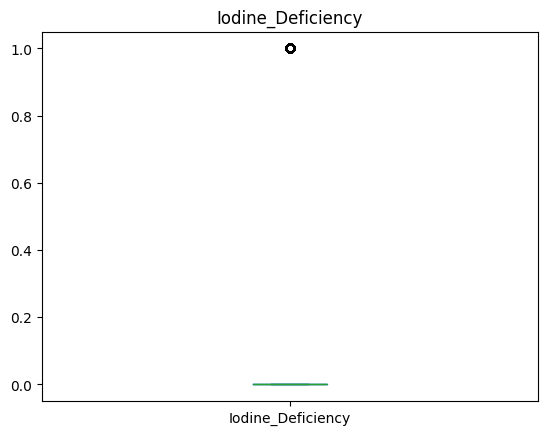

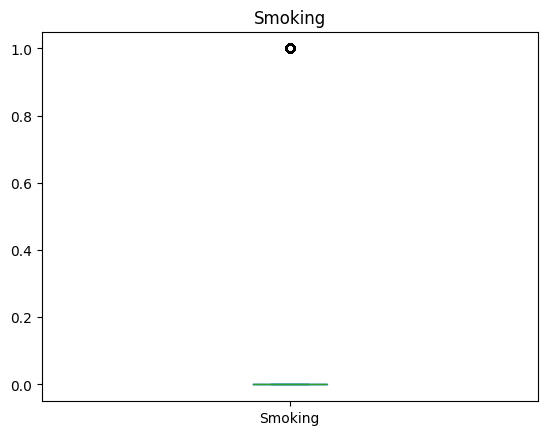

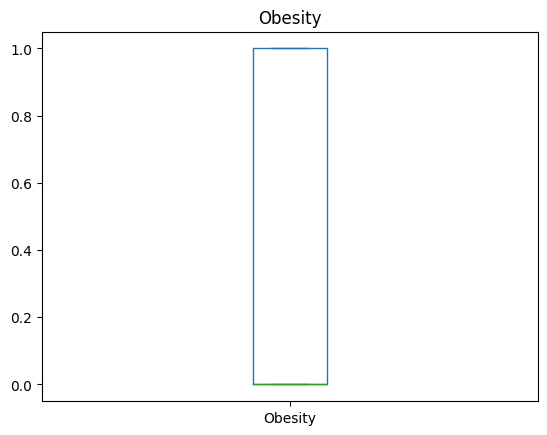

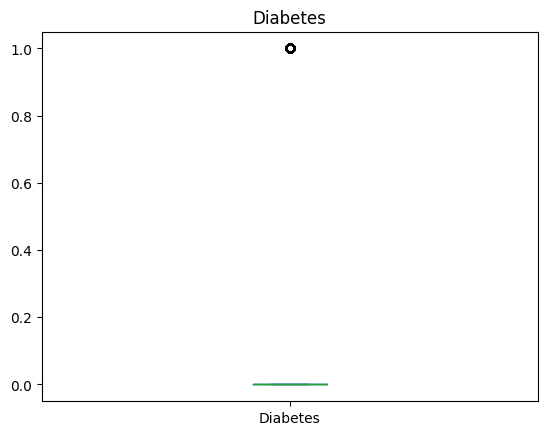

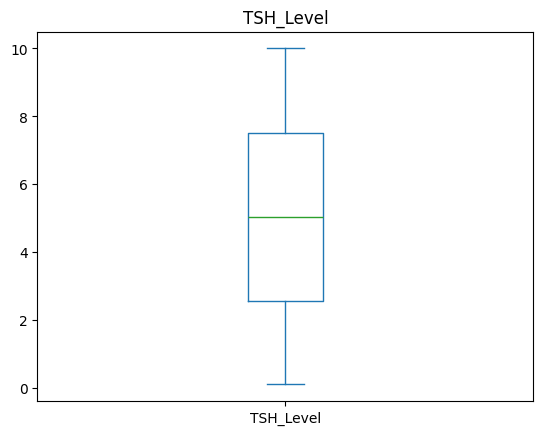

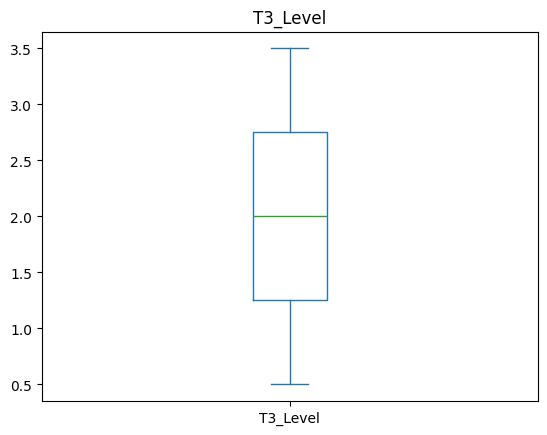

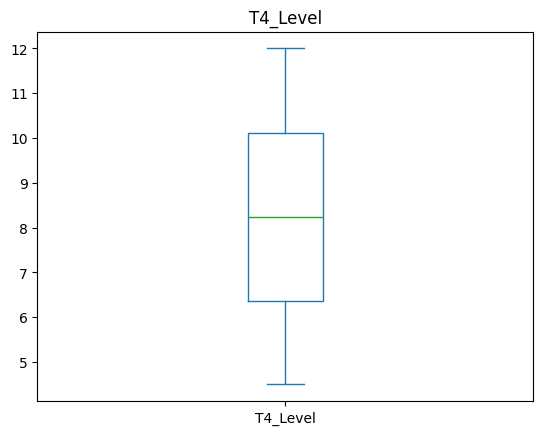

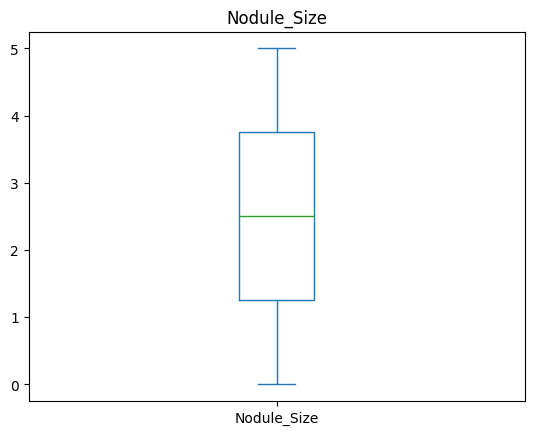

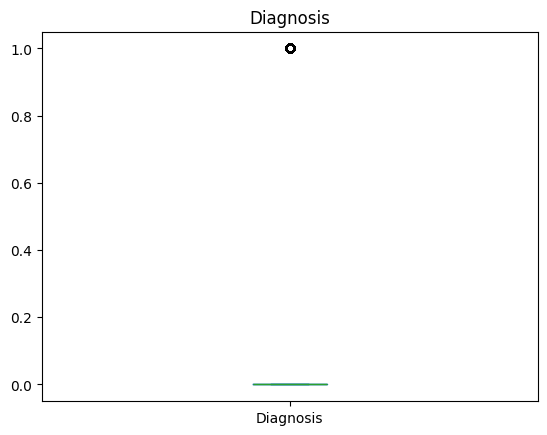

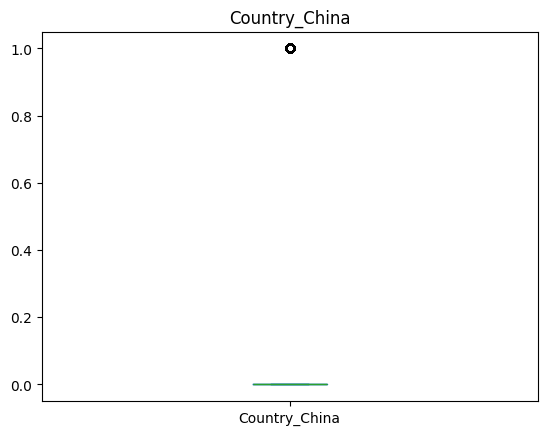

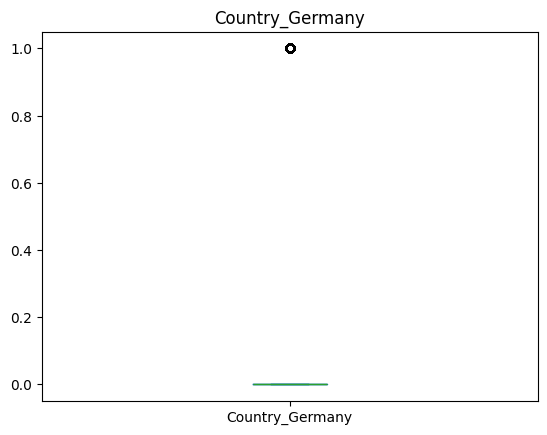

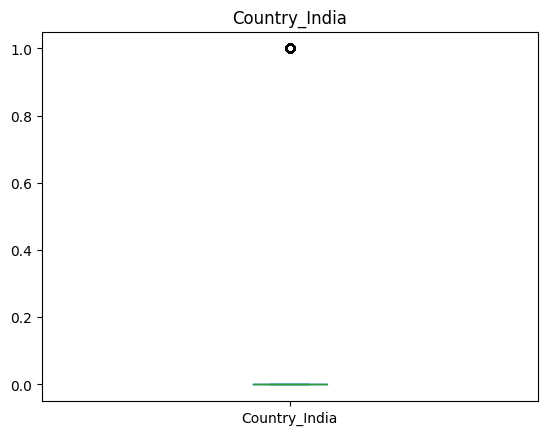

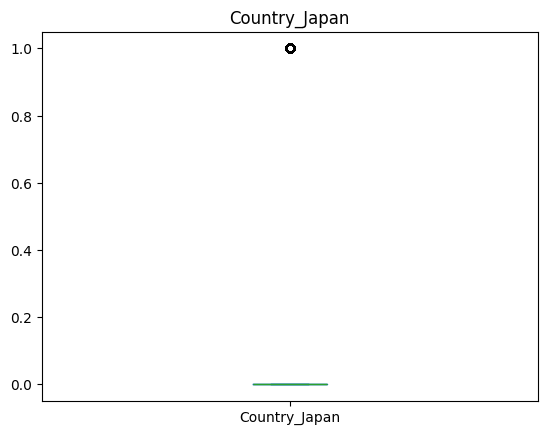

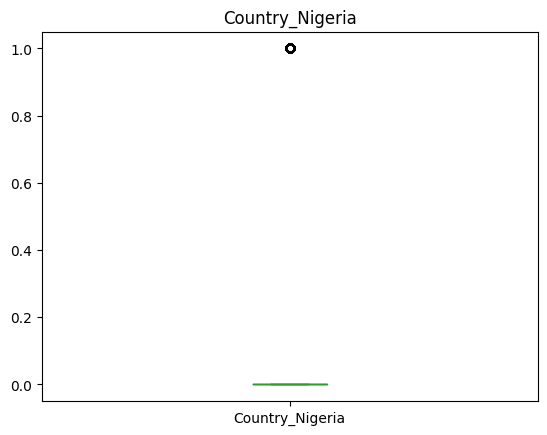

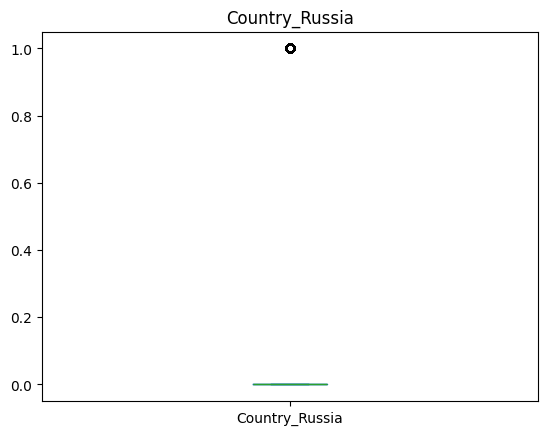

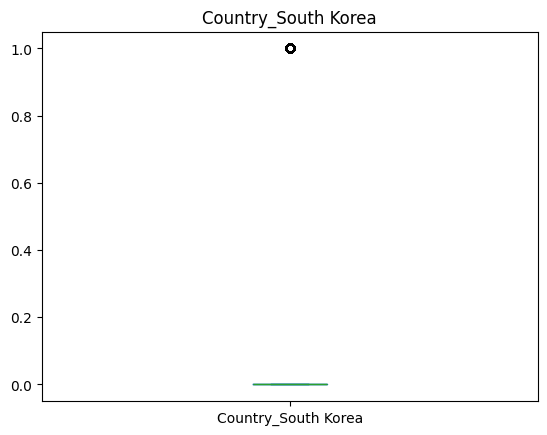

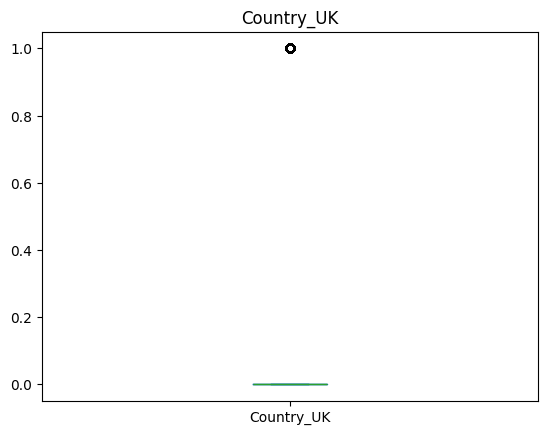

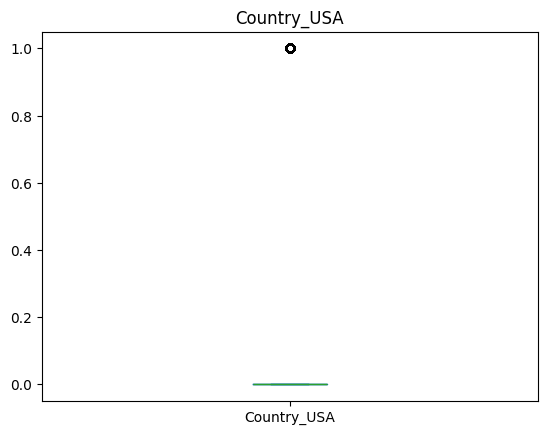

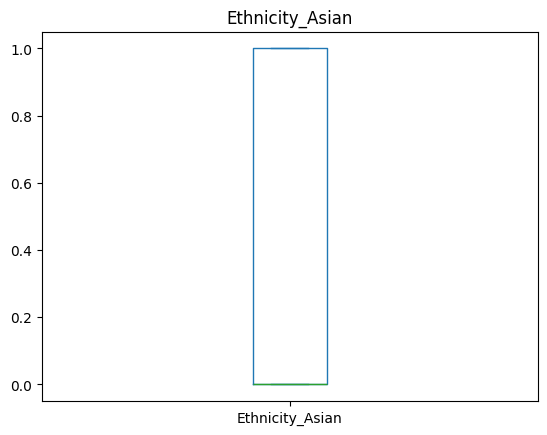

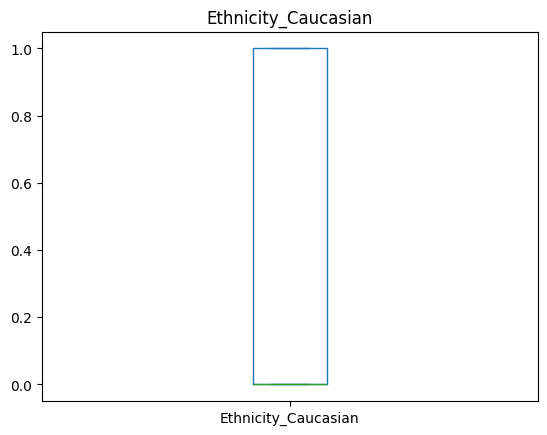

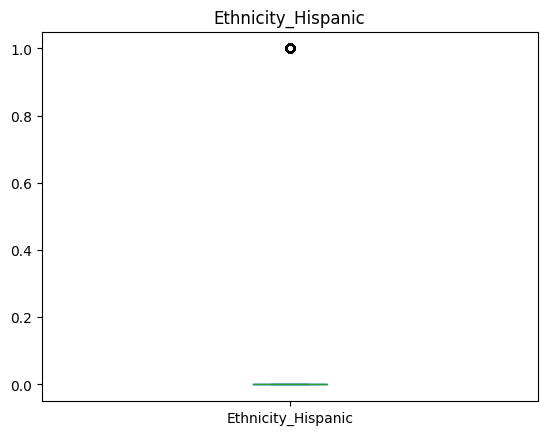

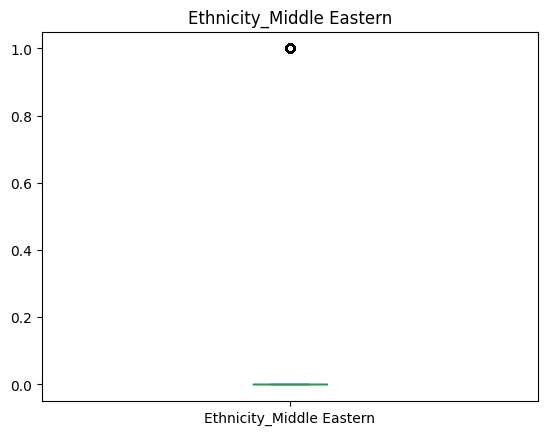

In [19]:
for i in df:
    if df[i].dtype=='float64' or df[i].dtype=='int':
        df[i].plot(kind='box')
        plt.title(i)
        plt.show()

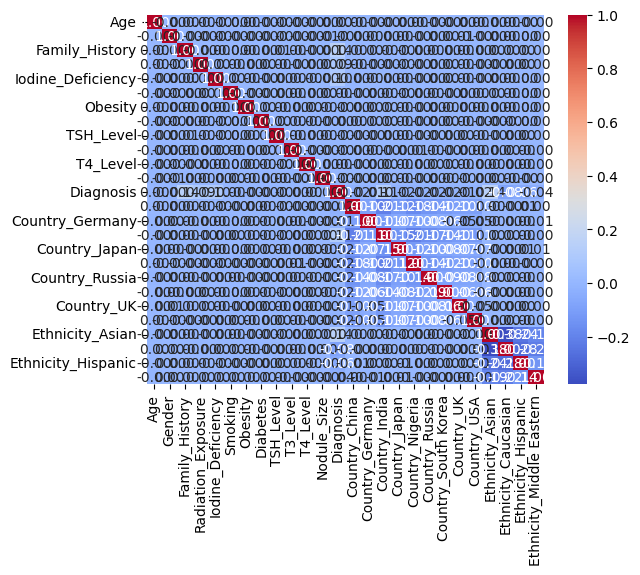

In [20]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt=".2f")
plt.show()

In [21]:
x=df_new.drop(columns="Diagnosis")
y=df_new['Diagnosis']

,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,66,1,0,1,0,0,0,0,9.37,1.67,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29,1,0,1,0,0,0,0,1.83,1.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,86,1,0,0,0,0,0,0,6.26,2.59,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75,0,0,0,0,0,0,0,4.10,2.62,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,35,0,1,1,0,0,0,0,9.10,2.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,0,0,0,0,0,1,0,2.00,0.64,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212687,89,1,0,0,0,0,1,0,9.77,3.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212688,72,0,0,0,0,0,0,1,7.72,2.44,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212689,85,0,0,0,0,0,0,1,5.62,2.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=1)

Original (No Sampling):
Diagnosis
0    15448
1     4552
Name: count, dtype: int64


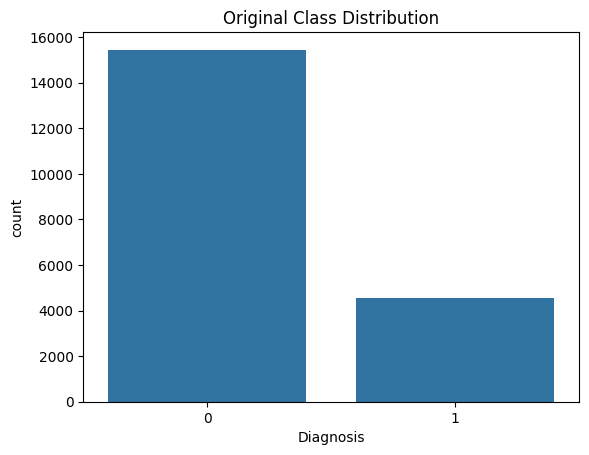

In [31]:
print("Original (No Sampling):")
print(pd.Series(y).value_counts())
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

KNeighborsClassifier() 
--------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4654
           1       0.59      0.34      0.43      1346

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000

79.98333333333333


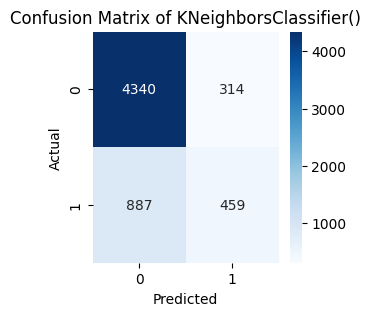

SVC() 
--------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4654
           1       0.69      0.46      0.55      1346

    accuracy                           0.83      6000
   macro avg       0.77      0.70      0.73      6000
weighted avg       0.82      0.83      0.82      6000

83.3


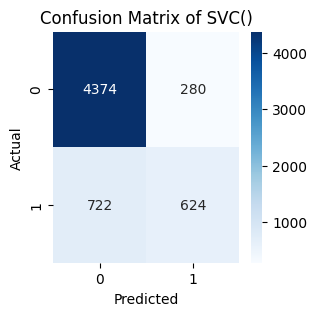

DecisionTreeClassifier() 
--------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4654
           1       0.37      0.41      0.39      1346

    accuracy                           0.71      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.72      0.71      0.72      6000

71.45


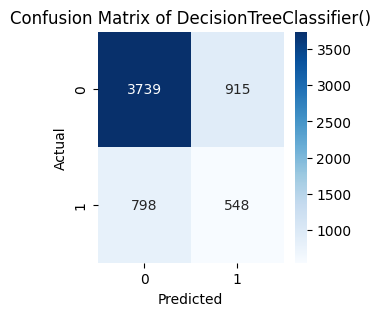

GaussianNB() 
--------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4654
           1       0.44      0.33      0.38      1346

    accuracy                           0.76      6000
   macro avg       0.63      0.60      0.61      6000
weighted avg       0.73      0.76      0.74      6000

75.53333333333333


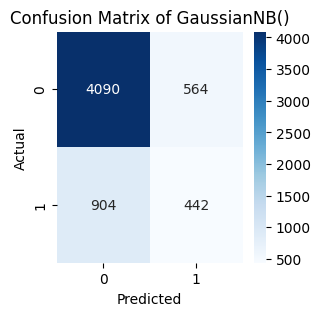

RandomForestClassifier() 
--------
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4654
           1       0.69      0.39      0.50      1346

    accuracy                           0.82      6000
   macro avg       0.77      0.67      0.70      6000
weighted avg       0.81      0.82      0.80      6000

82.39999999999999


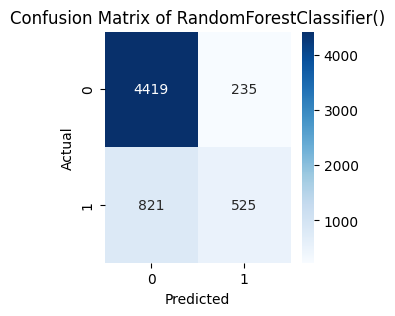

GradientBoostingClassifier() 
--------
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4654
           1       0.69      0.38      0.49      1346

    accuracy                           0.82      6000
   macro avg       0.77      0.67      0.69      6000
weighted avg       0.81      0.82      0.80      6000

82.28333333333333


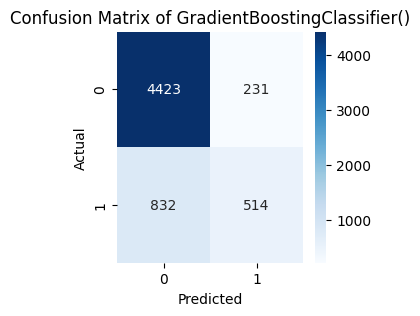

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) 
--------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4654
           1       0.65      0.37      0.47      1346

    accuracy                           0.81      6000
   macro av

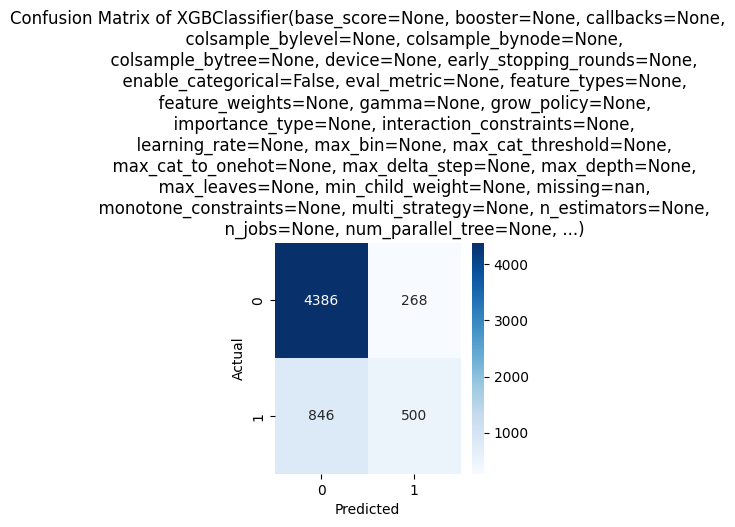

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
models=[KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(model,"\n--------")
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred)*100)
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",cmap="Blues",annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix of {model}")
    plt.show()

Under

In [35]:
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()
x_under,y_under=under.fit_resample(x_scaled,y)

Under-sampled:
Diagnosis
0    4552
1    4552
Name: count, dtype: int64


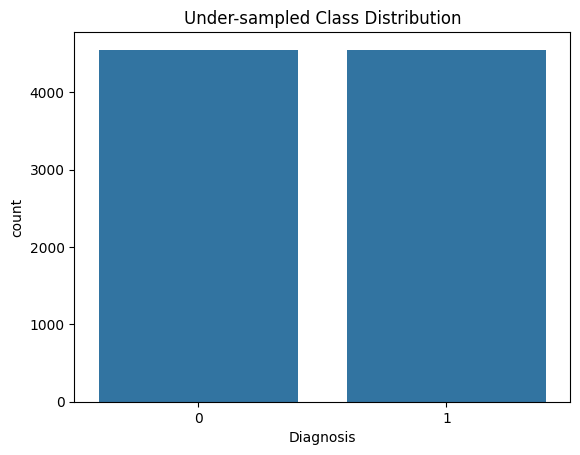

In [36]:
print("Under-sampled:")
print(pd.Series(y_under).value_counts())
sns.countplot(x=y_under)
plt.title("Under-sampled Class Distribution")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_under,y_under,test_size=0.3,random_state=1)

KNeighborsClassifier() 
--------
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1358
           1       0.66      0.57      0.61      1374

    accuracy                           0.64      2732
   macro avg       0.64      0.64      0.63      2732
weighted avg       0.64      0.64      0.63      2732

63.61639824304539


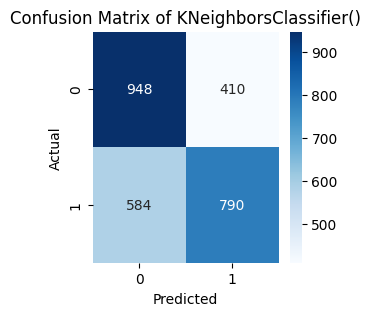

SVC() 
--------
              precision    recall  f1-score   support

           0       0.63      0.94      0.75      1358
           1       0.88      0.45      0.60      1374

    accuracy                           0.69      2732
   macro avg       0.76      0.70      0.67      2732
weighted avg       0.76      0.69      0.67      2732

69.36310395314787


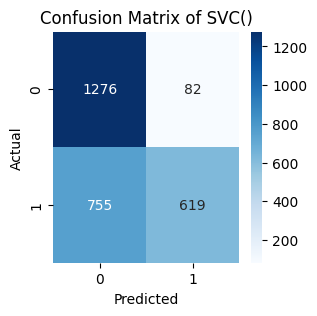

DecisionTreeClassifier() 
--------
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1358
           1       0.59      0.60      0.60      1374

    accuracy                           0.59      2732
   macro avg       0.59      0.59      0.59      2732
weighted avg       0.59      0.59      0.59      2732

59.260614934114194


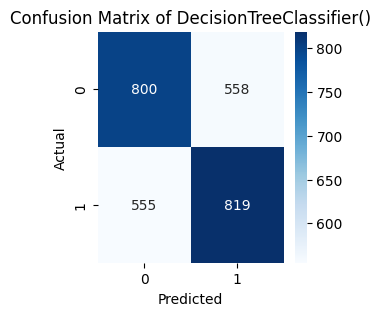

GaussianNB() 
--------
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      1358
           1       0.61      0.62      0.61      1374

    accuracy                           0.61      2732
   macro avg       0.61      0.61      0.61      2732
weighted avg       0.61      0.61      0.61      2732

60.797950219619324


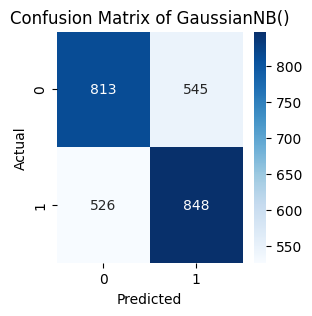

RandomForestClassifier() 
--------
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1358
           1       0.74      0.51      0.60      1374

    accuracy                           0.66      2732
   macro avg       0.68      0.67      0.66      2732
weighted avg       0.68      0.66      0.66      2732

66.43484626647145


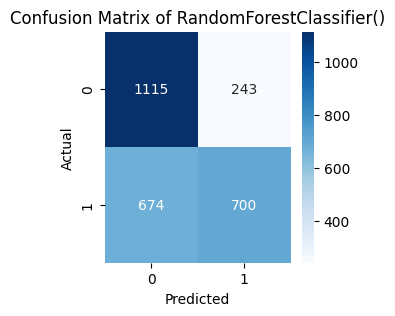

GradientBoostingClassifier() 
--------
              precision    recall  f1-score   support

           0       0.62      0.87      0.73      1358
           1       0.79      0.48      0.60      1374

    accuracy                           0.67      2732
   macro avg       0.71      0.68      0.66      2732
weighted avg       0.71      0.67      0.66      2732

67.4597364568082


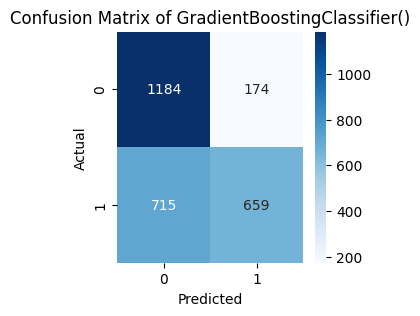

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) 
--------
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      1358
           1       0.68      0.57      0.62      1374

    accuracy                           0.65      2732
   macro av

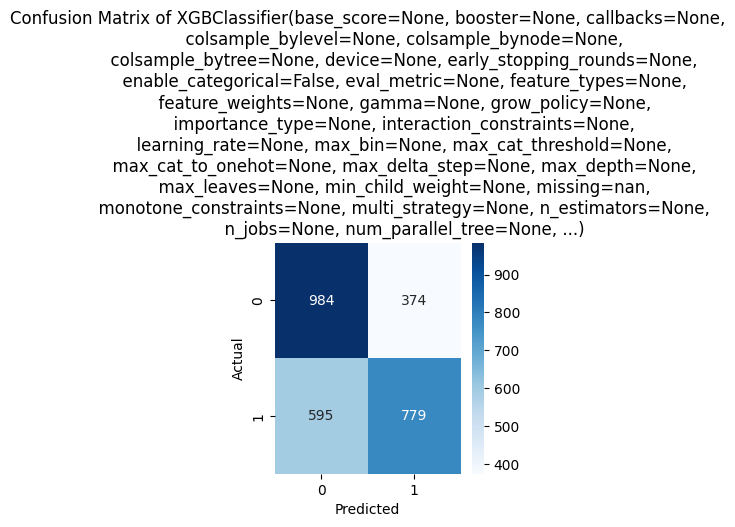

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
models=[KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(model,"\n--------")
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred)*100)
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",cmap="Blues",annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix of {model}")
    plt.show()

Over

In [39]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x_over,y_over=over.fit_resample(x_scaled,y)

Over-sampled:
Diagnosis
0    15448
1    15448
Name: count, dtype: int64


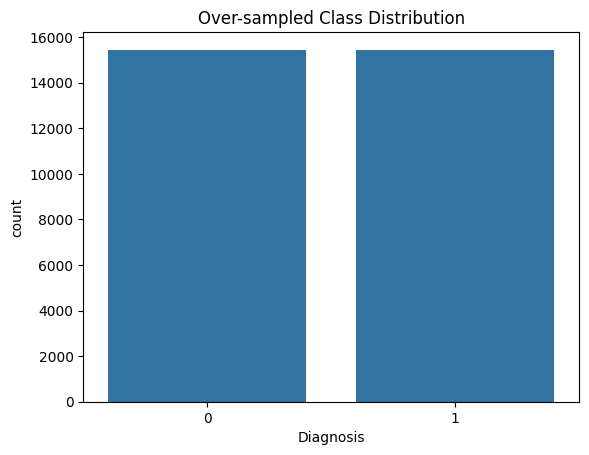

In [40]:
print("Over-sampled:")
print(pd.Series(y_over).value_counts())
sns.countplot(x=y_over)
plt.title("Over-sampled Class Distribution")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=1)

KNeighborsClassifier() 
--------
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      4711
           1       0.69      0.80      0.74      4558

    accuracy                           0.72      9269
   macro avg       0.73      0.73      0.72      9269
weighted avg       0.73      0.72      0.72      9269

72.46736433272197


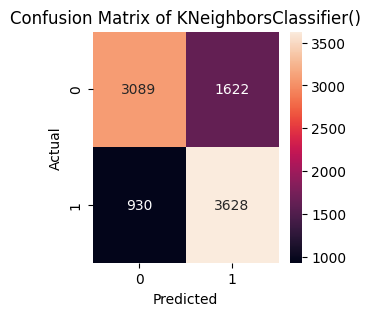

SVC() 
--------
              precision    recall  f1-score   support

           0       0.66      0.93      0.77      4711
           1       0.88      0.49      0.63      4558

    accuracy                           0.72      9269
   macro avg       0.77      0.71      0.70      9269
weighted avg       0.77      0.72      0.70      9269

71.77689071097205


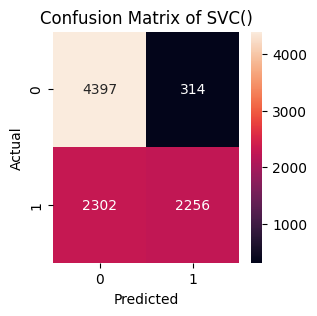

DecisionTreeClassifier() 
--------
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      4711
           1       0.81      0.95      0.87      4558

    accuracy                           0.86      9269
   macro avg       0.87      0.86      0.86      9269
weighted avg       0.87      0.86      0.86      9269

86.07185241126335


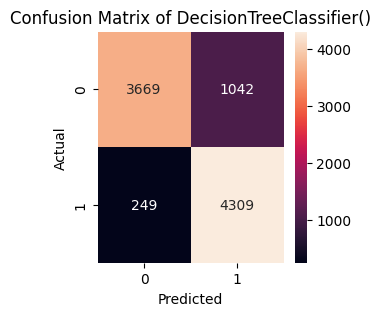

GaussianNB() 
--------
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      4711
           1       0.60      0.63      0.62      4558

    accuracy                           0.61      9269
   macro avg       0.61      0.61      0.61      9269
weighted avg       0.61      0.61      0.61      9269

61.2255906786061


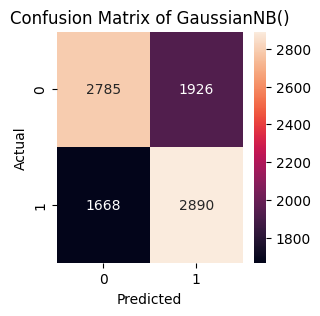

RandomForestClassifier() 
--------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4711
           1       0.94      0.95      0.94      4558

    accuracy                           0.94      9269
   macro avg       0.94      0.94      0.94      9269
weighted avg       0.94      0.94      0.94      9269

94.47621102600064


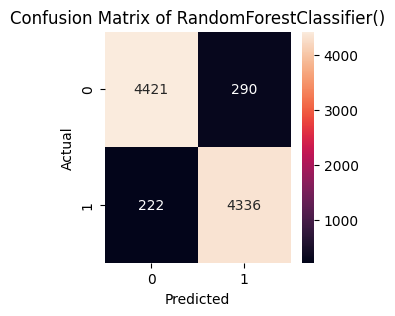

GradientBoostingClassifier() 
--------
              precision    recall  f1-score   support

           0       0.65      0.90      0.76      4711
           1       0.83      0.50      0.63      4558

    accuracy                           0.70      9269
   macro avg       0.74      0.70      0.69      9269
weighted avg       0.74      0.70      0.69      9269

70.47146401985111


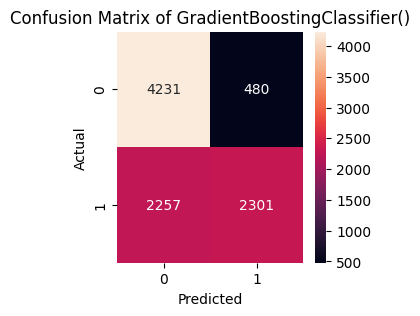

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) 
--------
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4711
           1       0.84      0.79      0.81      4558

    accuracy                           0.82      9269
   macro av

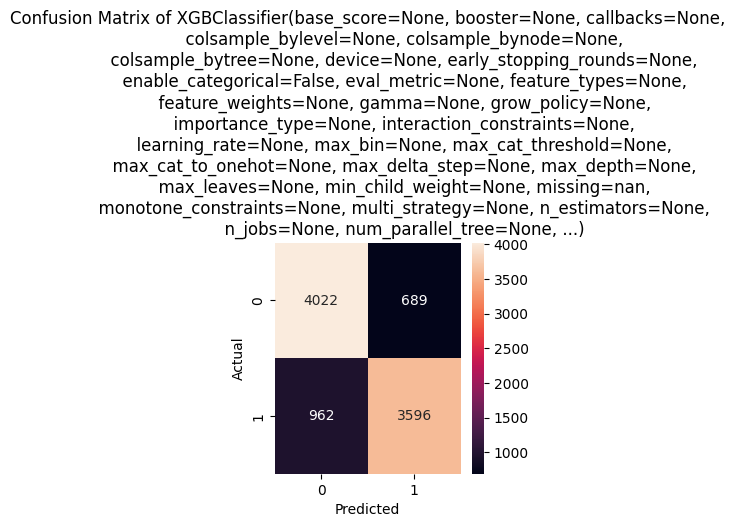

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
models=[KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(model,"\n--------")
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred)*100)
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix of {model}")
    plt.show()

SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_over_s,y_over_s=smote.fit_resample(x_scaled,y)

SMOTE:
Diagnosis
0    15448
1    15448
Name: count, dtype: int64


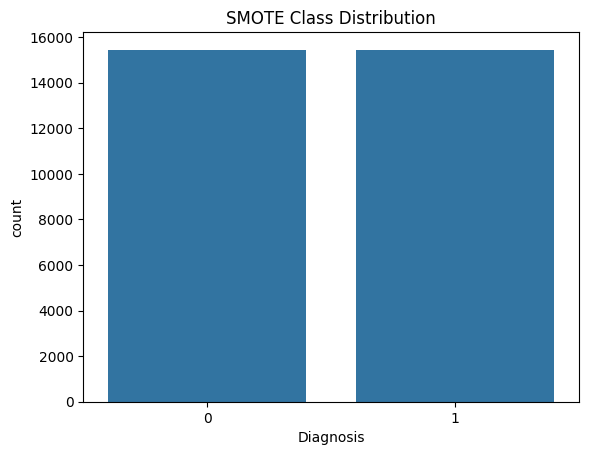

In [44]:
print("SMOTE:")
print(pd.Series(y_over_s).value_counts())
sns.countplot(x=y_over_s)
plt.title("SMOTE Class Distribution")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over_s,y_over_s,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
models=[KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]

In [ ]:
GradientBoostingClassifier()

In [ ]:
XGBClassifier()

KNeighborsClassifier() 
--------
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      4711
           1       0.71      0.86      0.78      4558

    accuracy                           0.76      9269
   macro avg       0.77      0.76      0.75      9269
weighted avg       0.77      0.76      0.75      9269

75.6715934836552


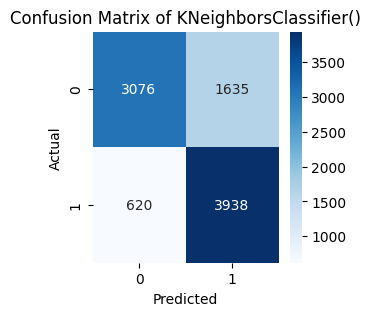

SVC() 
--------
              precision    recall  f1-score   support

           0       0.72      0.91      0.80      4711
           1       0.87      0.63      0.73      4558

    accuracy                           0.77      9269
   macro avg       0.79      0.77      0.77      9269
weighted avg       0.79      0.77      0.77      9269

77.1712158808933


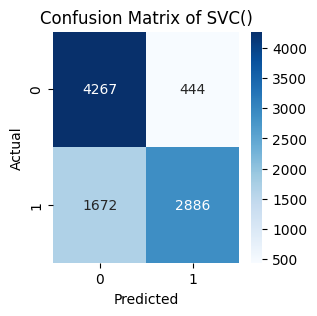

DecisionTreeClassifier() 
--------
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      4711
           1       0.72      0.74      0.73      4558

    accuracy                           0.73      9269
   macro avg       0.73      0.73      0.73      9269
weighted avg       0.73      0.73      0.73      9269

72.63998273815946


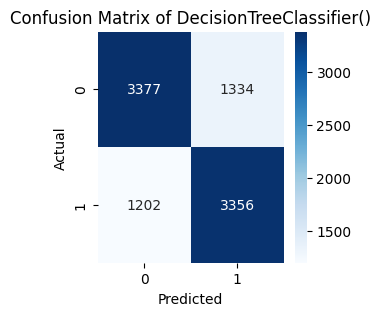

GaussianNB() 
--------
              precision    recall  f1-score   support

           0       0.64      0.58      0.60      4711
           1       0.60      0.66      0.63      4558

    accuracy                           0.62      9269
   macro avg       0.62      0.62      0.62      9269
weighted avg       0.62      0.62      0.62      9269

61.79738914661775


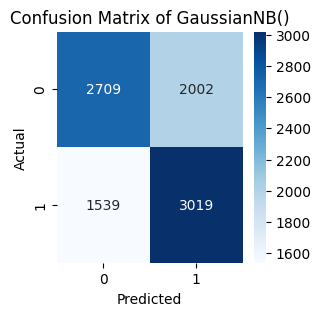

RandomForestClassifier() 
--------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4711
           1       0.90      0.79      0.84      4558

    accuracy                           0.85      9269
   macro avg       0.86      0.85      0.85      9269
weighted avg       0.86      0.85      0.85      9269

85.46768799223217


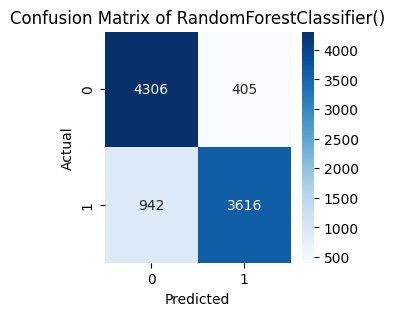

GradientBoostingClassifier() 
--------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      4711
           1       0.89      0.63      0.74      4558

    accuracy                           0.78      9269
   macro avg       0.81      0.78      0.78      9269
weighted avg       0.81      0.78      0.78      9269

78.30402416657675


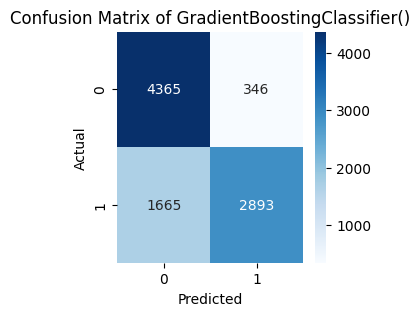

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) 
--------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      4711
           1       0.88      0.76      0.81      4558

    accuracy                           0.83      9269
   macro av

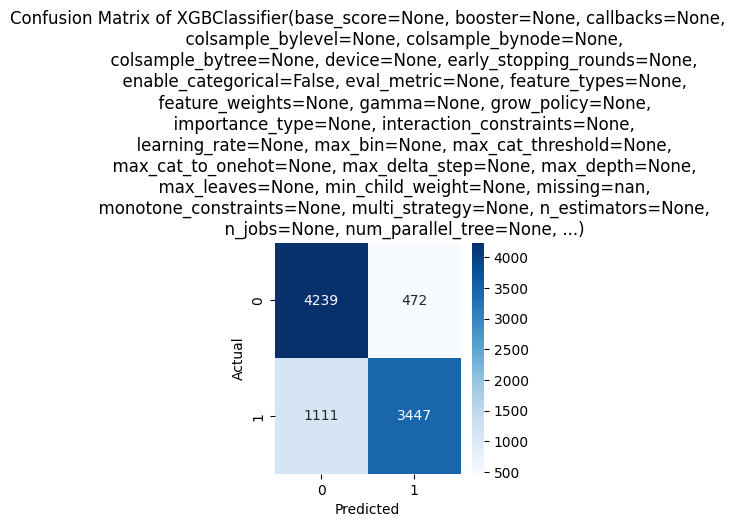

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
models=[KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(model,"\n--------")
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred)*100)
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",cmap="Blues",annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix of {model}")
    plt.show()

Final model

In [47]:
x=df.drop(columns="Diagnosis")
y=df['Diagnosis']

In [48]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

Original (No Sampling):
Diagnosis
0    163196
1     49495
Name: count, dtype: int64


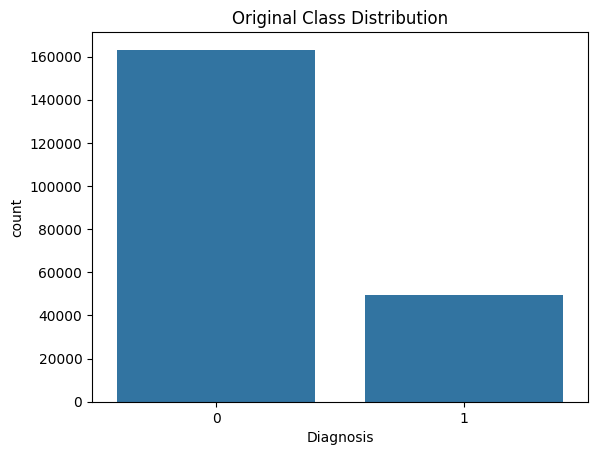

In [49]:
print("Original (No Sampling):")
print(pd.Series(y).value_counts())
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.show()

In [50]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_over_s,y_over_s=smote.fit_resample(x_scaled,y)

SMOTE:
Diagnosis
0    163196
1    163196
Name: count, dtype: int64


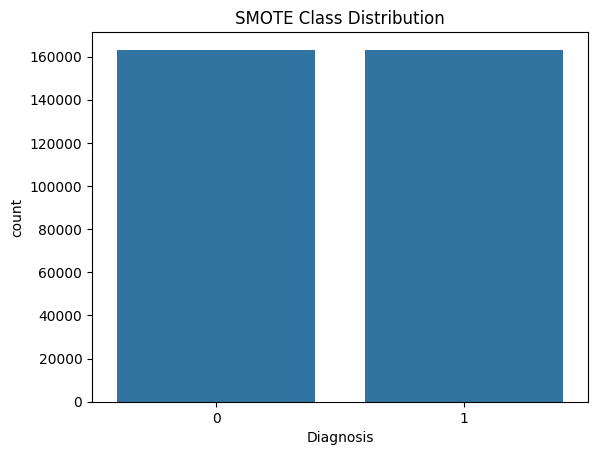

In [51]:
print("SMOTE:")
print(pd.Series(y_over_s).value_counts())
sns.countplot(x=y_over_s)
plt.title("SMOTE Class Distribution")
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over_s,y_over_s,test_size=0.3,random_state=1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) 
--------
              precision    recall  f1-score   support

           0       0.74      0.94      0.83     49139
           1       0.92      0.67      0.77     48779

    accuracy                           0.80     97918
   macro av

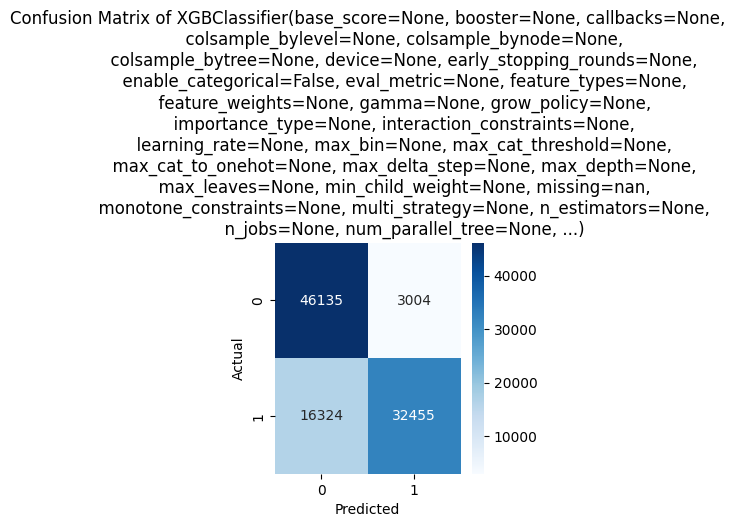

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(xgb,"\n--------")
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",cmap="Blues",annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix of {xgb}")
plt.show()

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

search = RandomizedSearchCV(xgb, params, n_iter=20, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
search.fit(x_train, y_train)

print("Best parameters:", search.best_params_)
print("Best accuracy:", search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\mail4\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:10:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.6}
Best accuracy: 0.8081619790435672


In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    gamma=1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)


from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\mail4\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:10:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8044486202741069
              precision    recall  f1-score   support

           0       0.74      0.93      0.83     49139
           1       0.91      0.67      0.77     48779

    accuracy                           0.80     97918
   macro avg       0.83      0.80      0.80     97918
weighted avg       0.83      0.80      0.80     97918



In [56]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    gamma=1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over_s,y_over_s,test_size=0.3,random_state=1)

In [58]:
xgb.fit(x_train,y_train)

C:\Users\mail4\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:10:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [59]:
dist1={'model':xgb,'label_encoders':le_dict1,'onehot_encoders': oh_dict1,'scaler':minmax}

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(dist1, f)